# Customer Churn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.pipeline import Pipeline
from sklearn import metrics

## Data Analysis

In [3]:
URL = 'https://github.com/anvarnarz/praktikum_datasets/blob/main/E-Commerce-Dataset.xlsx?raw=true'
df = pd.read_excel(URL, sheet_name = 'E Comm')
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [4]:
df.shape

(5630, 20)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [6]:
df.isnull().sum()

,0
CustomerID,0
Churn,0
Tenure,264
PreferredLoginDevice,0
CityTier,0
WarehouseToHome,251
PreferredPaymentMode,0
Gender,0
HourSpendOnApp,255
NumberOfDeviceRegistered,0


In [7]:
df['Churn'].value_counts()

,count
Churn,
0,4682
1,948


In [8]:
churn_rate = df['Churn'].value_counts(normalize=True)
churn_rate

,proportion
Churn,
0,0.831616
1,0.168384


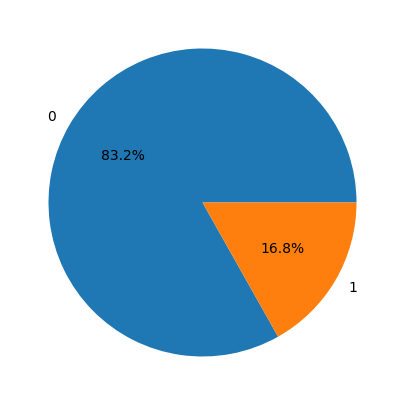

In [9]:
plt.figure(figsize = (5,5))
plt.pie(churn_rate, labels = churn_rate.index, autopct = '%1.1f%%')
plt.show()

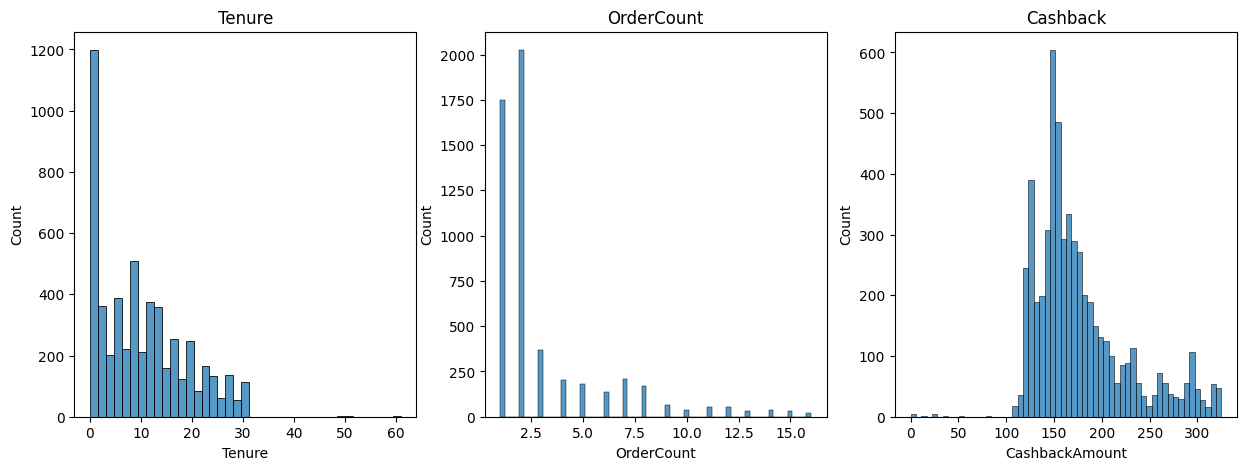

In [10]:
# Subplots
fig, axes = plt.subplots(1,3, figsize = (15,5))

#Tenure
sns.histplot(data = df, x = 'Tenure', ax = axes[0])
axes[0].set_title('Tenure')

#OrderCount
sns.histplot(data = df, x = 'OrderCount', ax = axes[1])
axes[1].set_title('OrderCount')

#Cashback
sns.histplot(data = df, x = 'CashbackAmount', ax = axes[2])
axes[2].set_title('Cashback')

plt.show()

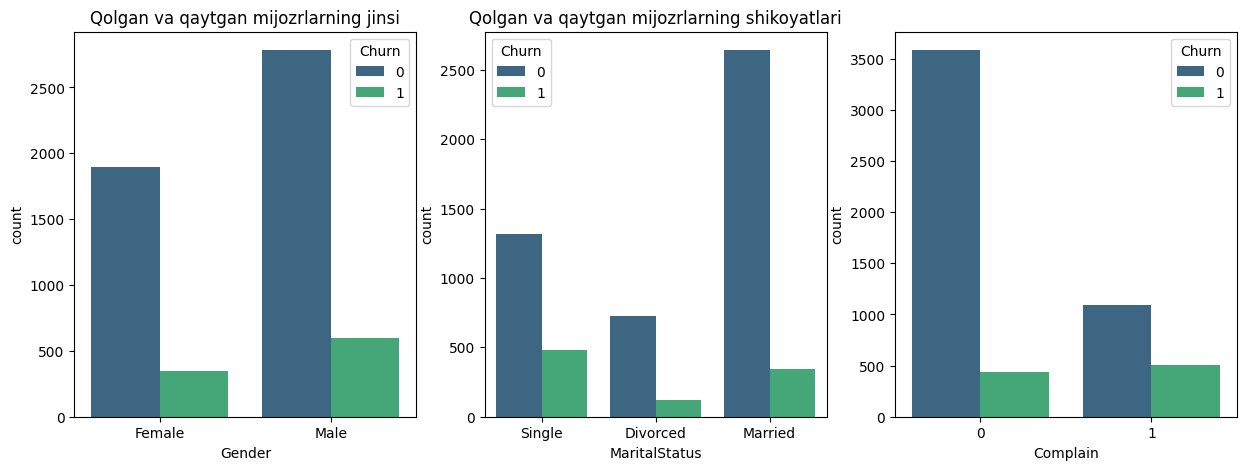

In [35]:
fig, axes = plt.subplots(1,3, figsize=(15,5))

sns.countplot(x='Gender', hue='Churn', palette='viridis', data=df, ax=axes[0])
axes[0].set_title("Qolgan va qaytgan mijozrlarning jinsi")

sns.countplot(x='MaritalStatus', hue='Churn', palette='viridis', data=df, ax=axes[1])
axes[1].set_title("Qolgan va qaytgan mijozrlarning oilaviy xolati")

sns.countplot(x='Complain', hue='Churn', palette='viridis', data=df, ax=axes[2])
axes[1].set_title("Qolgan va qaytgan mijozrlarning shikoyatlari")

plt.show()

## Data Cleaning

In [11]:
df.isnull().sum().sum()

1856

In [12]:
data = df[['Churn', 'Tenure', 'Complain', 'DaySinceLastOrder', 'CashbackAmount', 'MaritalStatus','Gender']]
data.isnull().sum().sum()

571

In [13]:
data.dropna(inplace=True)

<ipython-input-13-f1116dacf2bb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


In [14]:
data.shape

(5059, 7)

In [15]:
# Turning our categorical data into Numerical
data = pd.get_dummies(data, dtype = 'int')
data.head()

,Churn,Tenure,Complain,DaySinceLastOrder,CashbackAmount,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Gender_Female,Gender_Male
0,1,4.0,1,5.0,159.93,0,0,1,1,0
3,1,0.0,0,3.0,134.07,0,0,1,0,1
4,1,0.0,0,3.0,129.60,0,0,1,0,1
5,1,0.0,1,7.0,139.19,0,0,1,1,0
8,1,13.0,1,2.0,126.83,1,0,0,0,1


In [16]:
X = data.drop('Churn', axis = 1)
y = data['Churn']

In [17]:
# Standard Scaler
scale = StandardScaler()
X = scale.fit_transform(X)

In [18]:
# Spliting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 0)

## Machine Learning

### Logistic Regression

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       849
           1       0.75      0.38      0.50       163

    accuracy                           0.88      1012
   macro avg       0.82      0.68      0.72      1012
weighted avg       0.87      0.88      0.86      1012

Accuracy score: 0.8794466403162056


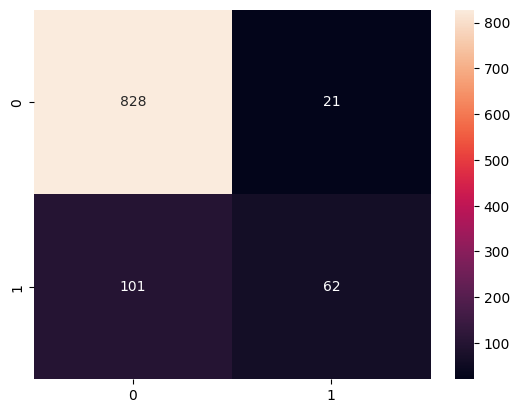

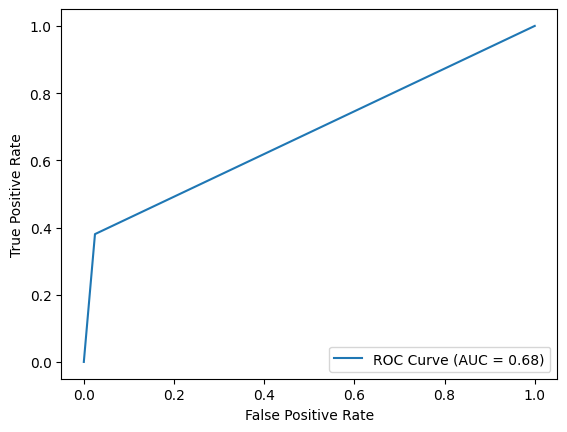

In [28]:
# Model
LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)

#Evaluating Model
y_predict = LR_model.predict(X_test)
print(classification_report(y_test, y_predict))
print(f"Accuracy score: {metrics.accuracy_score(y_test, y_predict)}")

#Confusion matrix
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot = True, fmt = 'g')
plt.show()

#ROC Curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc = roc_auc, estimator_name = 'ROC Curve')
display.plot()
plt.show()

### Support Vector Machines

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       849
           1       0.67      0.31      0.42       163

    accuracy                           0.86      1012
   macro avg       0.77      0.64      0.67      1012
weighted avg       0.85      0.86      0.84      1012

Accuracy score: 0.8636363636363636


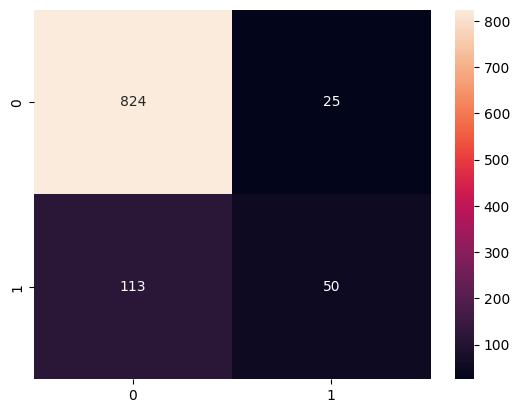

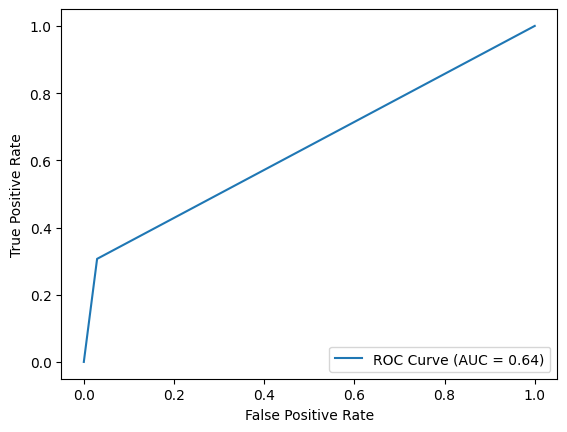

In [27]:
# Model
svm_model = SVC()
svm_model.fit(X_train, y_train)

#Evaluating Model
y_predict = svm_model.predict(X_test)
print(classification_report(y_test, y_predict))
print(f"Accuracy score: {metrics.accuracy_score(y_test, y_predict)}")

#Confusion matrix
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot = True, fmt = 'g')
plt.show()

#ROC Curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc = roc_auc, estimator_name = 'ROC Curve')
display.plot()
plt.show()

### Decision Tree Classifier

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       849
           1       0.83      0.90      0.86       163

    accuracy                           0.95      1012
   macro avg       0.91      0.93      0.92      1012
weighted avg       0.96      0.95      0.96      1012

Accuracy score: 0.9545454545454546


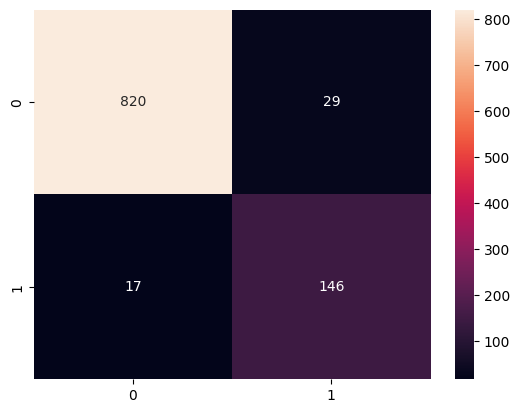

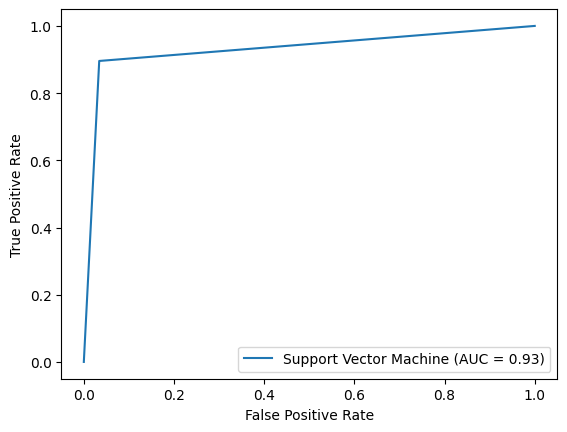

In [30]:
# Model
decision_model = DecisionTreeClassifier()
decision_model.fit(X_train, y_train)

#Evaluating Model
y_predict = decision_model.predict(X_test)
print(classification_report(y_test, y_predict))
print(f"Accuracy score: {metrics.accuracy_score(y_test, y_predict)}")

#Confusion matrix
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot = True, fmt = 'g')
plt.show()

#ROC Curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc = roc_auc, estimator_name = 'Support Vector Machine')
display.plot()
plt.show()

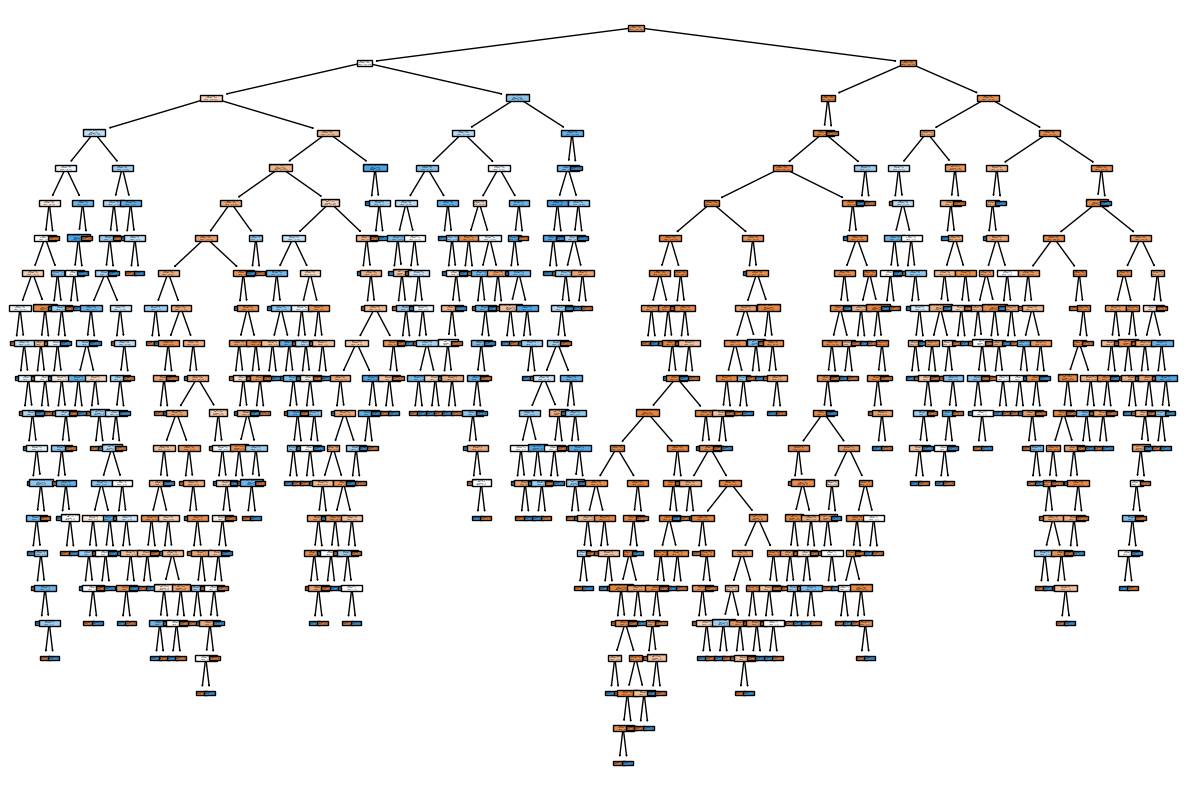

In [31]:
# Decision Tree Graph
cols = data.drop('Churn', axis = 1).columns
plt.figure(figsize = (15,10))
plot_tree(decision_model, feature_names = cols, filled = True)
plt.show()

### Random Forest

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       849
           1       0.87      0.77      0.82       163

    accuracy                           0.94      1012
   macro avg       0.91      0.88      0.89      1012
weighted avg       0.94      0.94      0.94      1012

Accuracy score: 0.9446640316205533


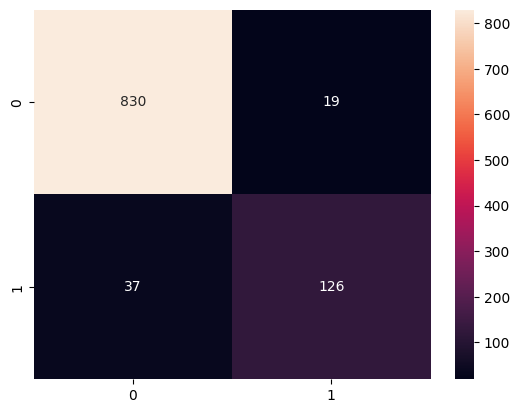

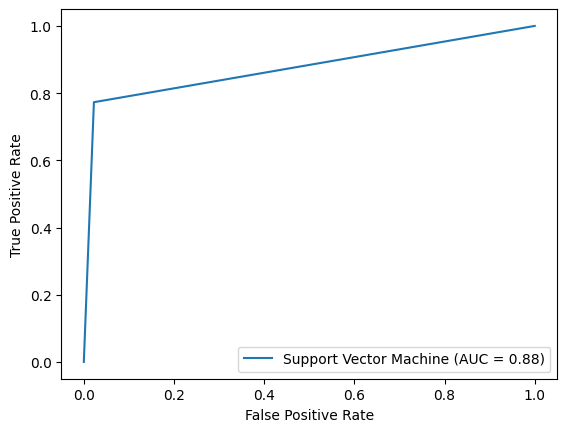

In [33]:
# Model
RF_model = RandomForestClassifier(n_estimators = 9)
RF_model.fit(X_train, y_train)

#Evaluating Model
y_predict = RF_model.predict(X_test)
print(classification_report(y_test, y_predict))
print(f"Accuracy score: {metrics.accuracy_score(y_test, y_predict)}")

#Confusion matrix
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot = True, fmt = 'g')
plt.show()

#ROC Curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc = roc_auc, estimator_name = 'Support Vector Machine')
display.plot()
plt.show()

### XGBoost

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       849
           1       0.86      0.78      0.82       163

    accuracy                           0.94      1012
   macro avg       0.91      0.88      0.89      1012
weighted avg       0.94      0.94      0.94      1012

Accuracy score: 0.9436758893280632


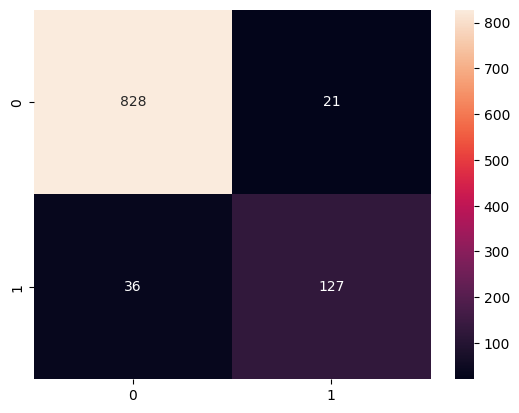

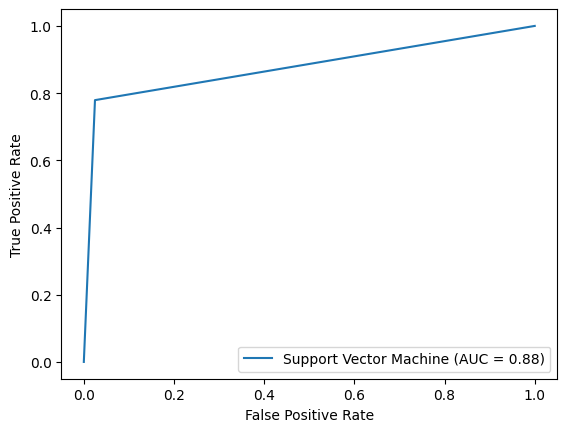

In [34]:
# Model
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

#Evaluating Model
y_predict = xgb_model.predict(X_test)
print(classification_report(y_test, y_predict))
print(f"Accuracy score: {metrics.accuracy_score(y_test, y_predict)}")

#Confusion matrix
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot = True, fmt = 'g')
plt.show()

#ROC Curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc = roc_auc, estimator_name = 'Support Vector Machine')
display.plot()
plt.show()